In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_specsII import create_spec
from fit2gaussII import fit2gauss

In [2]:
# import arrays
tube1 = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f1.sav',verbose=False,python_dict=False)
tube4 = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f4.sav',verbose=False,python_dict=False)
tube9 = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f9.sav',verbose=False,python_dict=False)

frac = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f4_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/spring2020/dat/goft_1403.dat.txt',comments='%',unpack=True)

/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/create_specsII.py:98: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


a2g[0] = -1827278.759995511
a1g[0] = 5756466.08016467
chi2g =  0.0019030067432967382
a2g =  [5.75646608e+06 1.40330004e+03 1.05343529e-01 0.00000000e+00
 1.40330004e+03 1.05343529e-01]
chi1g =  3.4612244726094357
chi2g =  -1.0


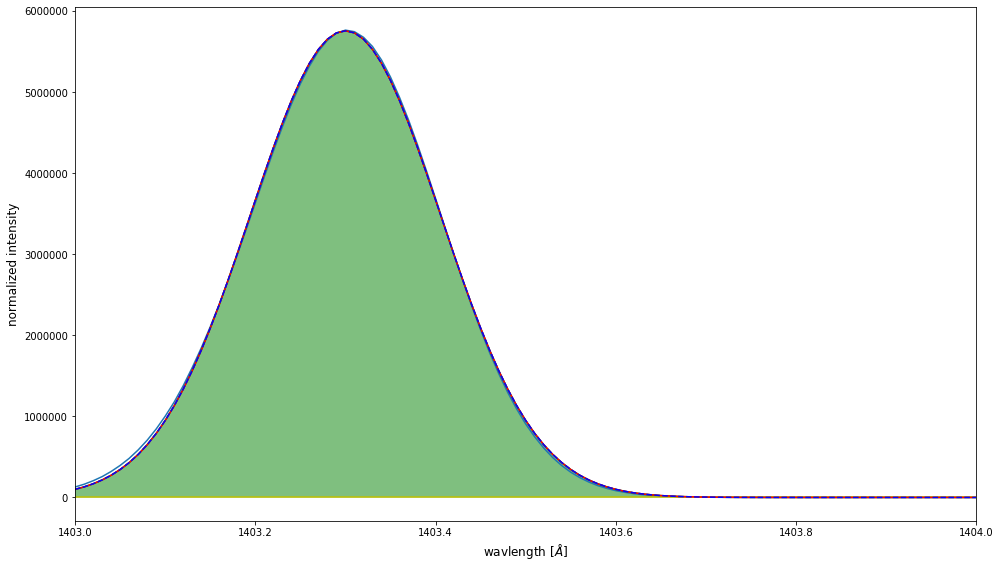

In [3]:
wav,spec,error = create_spec(tube1,frac,log10T,log10G,time=197)
errorII = np.sqrt(spec) # actual error
np.nan_to_num(errorII, copy=False, nan=0)
# add small continuum to calculated spectrum error
rando = np.random.randn(2000)*0.1*np.max(spec) #
too_small = np.where(errorII < 0.01*np.max(spec))
errorII += rando

res = fit2gauss(wav,spec,errorII,verbose=True)

# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
# spectra
ax1.plot(wav, spec)
# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 
#both
ax1.plot(wav,y2a+y2b, "r")
# single fit
ax1.plot(wav,y1g,'b--')

plt.xlim(1403,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [4]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1403
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  64.15597272045147 ----- "blue" velocity =  64.15597272045147


In [5]:
# single Gaussian
line = 1403
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  64.15597272045147


In [10]:
N = len(tube4.tarr) # length of tarr in time steps 
print(N)

I1,I4,I9 = np.zeros(N),np.zeros(N),np.zeros(N)
v_r = np.zeros(N)
v_b = np.zeros(N)

501


In [11]:
for i in range(N):
    while True:
            try:
                wav1,spec1,error1 = create_spec(tube1,frac,log10T,log10G,time=i)
                wav4,spec4,error4 = create_spec(tube4,frac,log10T,log10G,time=i)
                wav9,spec9,error9 = create_spec(tube9,frac,log10T,log10G,time=i)

                errorII1 = np.sqrt(spec1) # actual error
                errorII4 = np.sqrt(spec4) # actual error
                errorII9 = np.sqrt(spec9) # actual error
                np.nan_to_num(errorII1, copy=False, nan=0)
                np.nan_to_num(errorII4, copy=False, nan=0)
                np.nan_to_num(errorII9, copy=False, nan=0)
                # add small continuum to calculated spectrum error
                rando1 = np.random.randn(2000)*0.1*np.max(spec1) 
                rando4 = np.random.randn(2000)*0.1*np.max(spec4)
                rando9 = np.random.randn(2000)*0.1*np.max(spec9)
                too_small1 = np.where(errorII1 < 0.01*np.max(spec1))
                too_small4 = np.where(errorII4 < 0.01*np.max(spec4))
                too_small9 = np.where(errorII9 < 0.01*np.max(spec9))
                errorII1 += rando1
                errorII4 += rando4
                errorII9 += rando9

                res1 = fit2gauss(wav1,spec1,errorII1)
                res4 = fit2gauss(wav4,spec4,errorII4)
                res9 = fit2gauss(wav9,spec9,errorII9)
                
                a2g1 = res1["a2g"] # extract fit parameters
                a2g4 = res4["a2g"]
                a2g9 = res9["a2g"]
                
                I1[i] = np.max(spec1)
                I4[i] = np.max(spec4)
                I9[i] = np.max(spec9)

                #calculate Doppler velocities
                line = 1403
                #v1 = (a2g[1]-line)/line*3e5 # in km/s
                #v2 = (a2g[4]-line)/line*3e5
                
                #v_r[i] = np.maximum(v1,v2)
                #v_b[i] = np.minimum(v1,v2)
                
                
                
                break
                
                

            except RuntimeError:
                print("shit!")
                print('i = ')
                continue
    
    

/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/fit2gaussII.py:63: RuntimeWarning: invalid value encountered in double_scalars
  m1 = np.sum( yt*lam )/m0
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/fit2gaussII.py:81: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(m2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/fit2gaussII.py:34: RuntimeWarning: invalid value encountered in double_scalars
  s = mvec[3]/mvec[2]**(1.5) # the skewness
/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/fit2gaussII.py:37: RuntimeWarning: invalid value encountered in sqrt
  dv = np.sqrt(mvec[2]/f/(1.0-f)) # estimate o

[]

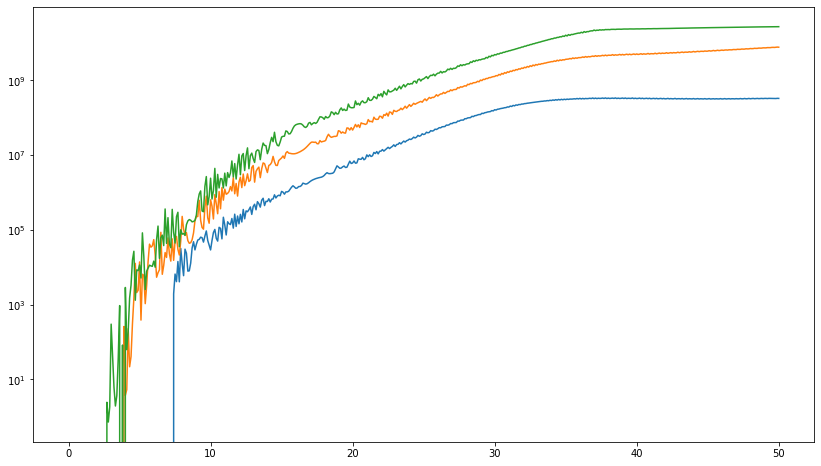

In [17]:
time = np.arange(0,50.1,0.1)
plt.figure(figsize=(14,8))
plt.plot(time,I1,time,I4,time,I9)
plt.semilogy()